TP 1 : Introduction aux K-moyennes
=============

Introduction au sujet
-----

L'objectif de ce TP est de faire des rappels sur les librairies numpy, scipy et matplotlib ainsi que de faire une implémentation de l'algorithme des K-moyennes.

**Afin d'avoir un code optimisé, vous éviterez d'utiliser les instructions python3 if, for et while (sauf mention contraire du sujet)**

Le code est à écrire en python3 à la suite des questions, dans ce fichier. Vous appuierez soit sur le bouton *run cell*, soit sur les touches *Ctrl-Entrée*, à l’intérieur de la zone de saisie, pour lancer l'exécution de vos commandes. Si la commande est en cours d’exécution une étoile apparaît à côté de la zone de saisie de la commande : In [\*]. Une fois le calcul achevé, l'étoile est remplacée par le numéro du run permettant de retrouver par la suite dans quel ordre ont été lancés chaque bloc.

Commencez par importer les librairies nécessaires au TP. Les dernières lignes sont spécifiques à l'usage d'un notebook. Elle permet d'indiquer que les affichages matplotlib doivent être fait dans le notebook et non dans une fenêtre extérieur. 

In [1]:
import numpy as np
import scipy as sc
import scipy.ndimage
import scipy.spatial.distance
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Affichage des images matplotlib dans le notebook
%matplotlib inline
#Centrage des images dans la fenetre du navigateur.
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

1- L'algorithme des K-moyennes
-----

Le code suivant permet de créer 100 points tirés au hasard selon une loi normale centré sur le point (1,-2) avec un écart-type de 0.3. Ces points sont ensuite affichés.

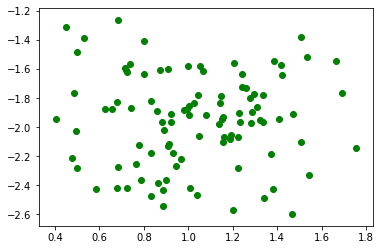

In [2]:
points =  np.random.randn(100,2)*0.3 +[1,-2]
plt.scatter(points[:,0],points[:,1],c='g')
plt.show()
#autre solution
#point1,point2 =  np.random.randn(100,2)*0.3 +[1],np.random.randn(100,2)*0.3 +[-2]
#plt.scatter(point1,point2,c='g')
#plt.show()

Créez trois groupes de 200 points tirés au hasard selon des lois normale d’écart type 0.05 et centrées sur les centres suivant :
* 0,8 ; 0,3
* 0,3 ; 0,2
* 0,5 ; 0,9

Affichez ces trois groupes sur une même figure avec trois couleurs différentes.

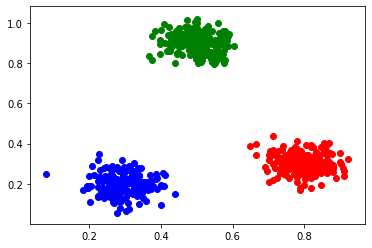

In [3]:
points1 =  np.random.randn(200,2)*0.05 +[0.8,0.3]
points2 =  np.random.randn(200,2)*0.05 +[0.3,0.2]
points3 =  np.random.randn(200,2)*0.05 +[0.5,0.9]
plt.scatter(points3[:,0],points3[:,1],c='g')
plt.scatter(points2[:,0],points2[:,1],c='b')
plt.scatter(points1[:,0],points1[:,1],c='r')
plt.show()

Mettez tous les points générez à la question précédente dans une seule variable *x*. Cette variable correspondra aux points de notre ensemble d'apprentissage de l'algorithme des K-moyennes que l'on veut mettre en place.

In [4]:
x=np.concatenate([points1, points2, points3], axis=0)
print("x::",x)
#more exercise
#plt.scatter(x[:200,0],x[:200,1],c='r')
#plt.scatter(x[201:400,0],x[201:400,1],c='b')
#plt.scatter(x[401:,0],x[401:,1],c='g')
#plt.show

x:: [[0.81314158 0.26790667]
 [0.78822579 0.18056058]
 [0.78119501 0.33911928]
 ...
 [0.45609715 0.91252865]
 [0.57653928 0.90708424]
 [0.48778865 0.84209293]]


In [5]:
# vérification de la dimension du vecteur x
x.shape==(600,2)

True

Écrivez une fonction *initCentre* qui prend le nombre de centre en paramètre, le nombre de dimension des centres (2 pour l'instant) et retourne des centres tirés selon une loi uniforme entre 0 et 1. Cela correspondra à l’initialisation de l’algorithme.

test_centre.shape[0], 1000


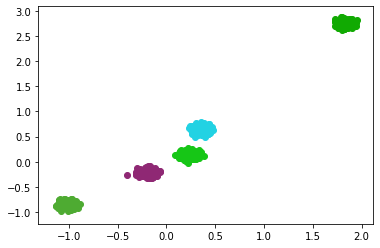

In [11]:
#more exercise
''' 
def initCentre(centre=5, dimention=2):
    number = 200
    out= np.empty((0,2), float)
    for i in range(centre):
        res = np.random.randn(number,dimention)*0.05 +np.random.randn(1,2)
        out = np.append(out, res, axis=0)
    return out, centre
    
test_centre, centre = initCentre(5,2)
print("test_centre.shape[0],",test_centre.shape[0])
number_of_colors = centre

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
for i in range(centre):
    myColor = list(np.random.choice(range(256), size=3))
    start = int(test_centre.shape[0]/centre)*i
    end = int(test_centre.shape[0]/centre)*(i+1)
    plt.scatter(test_centre[start:end,0],test_centre[start:end,1],c= color[i])
plt.show()
test_centre,_ = initCentre(5,2)
print('Test de la dimension de sortie de la fonction initCentre:',test_centre.shape ==(1000,2))
print('Test des valeurs min et max:',np.min(test_centre)>=0,1>=np.min(test_centre))
'''

In [6]:
def initCentre(nombrecentre, nombredimention):
    return np.random.rand(nombrecentre, nombredimention)

In [7]:
# vérification de la génération des centres
test_centre = initCentre(5,2)
print('Test de la dimension de sortie de la fonction initCentre:',test_centre.shape ==(5,2))
print('Test des valeurs min et max:',np.min(test_centre)>=0,1>=np.min(test_centre))

Test de la dimension de sortie de la fonction initCentre: True
Test des valeurs min et max: True True


Le code suivant permet de calculer la distance entre 3 points et 2 centres:

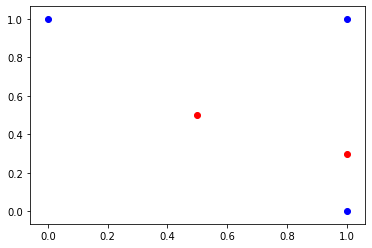

Distance entre  [0 1] et [0.5 0.5]  =  0.7071067811865476
Distance entre  [0 1] et [1.  0.3]  =  1.2206555615733703
Distance entre  [1 0] et [0.5 0.5]  =  0.7071067811865476
Distance entre  [1 0] et [1.  0.3]  =  0.3
Distance entre  [1 1] et [0.5 0.5]  =  0.7071067811865476
Distance entre  [1 1] et [1.  0.3]  =  0.7


In [8]:
# Création des points
points = np.array([[0,1],[1,0],[1,1]])
centres = np.array([[0.5,0.5],[1,0.3]])

# Affichage des points
plt.scatter(points[:,0],points[:,1],c='b')
plt.scatter(centres[:,0],centres[:,1],c='r')
plt.show()

# Calculs des distances entre les points et les centres
d =sc.spatial.distance.cdist(points,centres)

#Affichage du résultat
for ip in range(len(points)):
    for ic in range(len(centres)):
        print('Distance entre ',points[ip],'et',centres[ic],' = ',d[ip,ic])

Faites une fonction *association* qui prend en argument des points et des centres et qui retourne l’association entre chaque point et le numéro du centre le plus proche. Pour réaliser cette fonction, vous commencerez par calculer la distance entre les points et les centres comme dans le code précédent puis vous utiliserez la fonction argmin de numpy avec un axe bien choisi pour répondre à la question. 

In [9]:
def association(pointsa, center):
    d =sc.spatial.distance.cdist(pointsa,center)
    return np.argmin(d, axis=1)

In [10]:
# Vérification des associations des points et des centres définis précedemment
np.prod(association(points,centres) == np.array([0,1,1]))==1

True

Faites une fonction *updateCentres* qui prend des points, leurs associations à des centres, le nombre de centre et qui retourne la position des centres en fonction des associations.
Pour chaque centre vous calculerez le centre moyen des points qui lui ont été associé.  Si aucun point n’a été assigné à ce centre, vous en tirez un aléatoirement entre 0 et 1. 

Même si cela est faisable sans, vous pouvez utiliser une boucle for et un seul if pour cette question. 

In [11]:
def updateCentres(pointsa,associations, center):
# creer un points aléatoire au cas ou un centre n'a aucun point
    m= np.random.randn((centres,pointsa.shape[1]))
    for i in range(center):
        a = (associations==i)
        if np.sum(a)>0:
            m[i,:]= np.mean(pointsa[a], axis=0)
    return m

Créez une fonction *kmeans* implémentant l’algorithme de K-moyennes. Cette fonction prendra comme argument les points d’apprentissage, le nombre de cluster recherché et le nombre d’itération de l’algorithme. Elle retournera les centres trouvés. Vous utiliserez une boucle for pour chaque itération ainsi que les fonctions : *initCentre*, *association* et *updateCentres*.

In [13]:
def kmeans(pointsa, cluster, iteration):
    center = initCentre(cluster, pointsa.shape[1])
    for i in range(iteration):
        a = association(pointsa,center)
        center = updateCentres(pointsa, a, cluster)
    return center

Affichez sur une même figure les points contenus dans la variable *x* en bleu et les centres trouvés en rouge. Vous rechercherez 3 centres et vous ferez 10 itérations de l'algorithme. Le résultat correspond-t-il à celui attendu ?

In [14]:
centre = kmeans(x, 3, 10)
plt.scatter(x[:,0],x[:,1],c='r')
plt.scatter(centre[:,0],centre[:,1], c='b')
plt.show()

TypeError: 'tuple' object cannot be interpreted as an integer

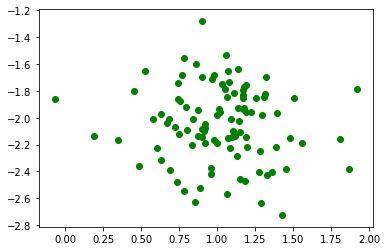

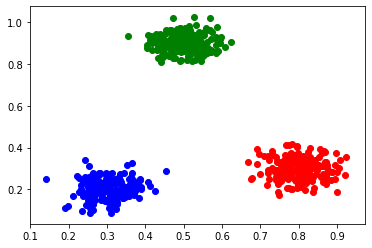

Test de la dimension de sortie de la fonction initCentre: True
Test des valeurs min et max: True True


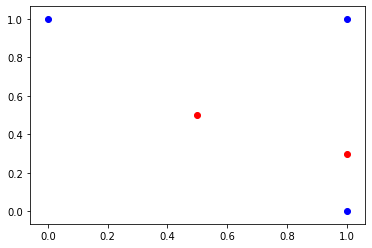

Distance entre  [0 1] et [0.5 0.5]  =  0.7071067811865476
Distance entre  [0 1] et [1.  0.3]  =  1.2206555615733703
Distance entre  [1 0] et [0.5 0.5]  =  0.7071067811865476
Distance entre  [1 0] et [1.  0.3]  =  0.3
Distance entre  [1 1] et [0.5 0.5]  =  0.7071067811865476
Distance entre  [1 1] et [1.  0.3]  =  0.7
[[0.80811372 0.35336392]
 [0.7461018  0.18623313]
 [0.83052918 0.27008221]
 ...
 [0.54072712 0.9539122 ]
 [0.47318871 0.82950478]
 [0.51355088 0.98236958]]


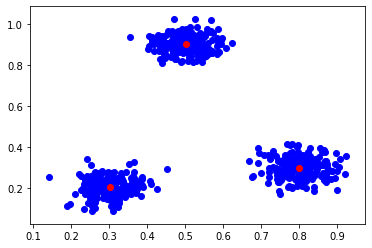

In [16]:
#la bonne solution 
points =  np.random.randn(100,2)*0.3 +[1,-2]
plt.scatter(points[:,0],points[:,1],c='g')
plt.show()
#
p1 =  np.random.randn(200,2)*0.05 +[0.8,0.3]
p2 =  np.random.randn(200,2)*0.05 +[0.3,0.2]
p3 =  np.random.randn(200,2)*0.05 +[0.5,0.9]
plt.scatter(p1[:,0],p1[:,1],c='r')
plt.scatter(p2[:,0],p2[:,1],c='b')
plt.scatter(p3[:,0],p3[:,1],c='g')
plt.show()
#concatenate
x = np.concatenate([p1, p2, p3], axis = 0)
# vérification de la dimension du vecteur x
x.shape==(600,2)
#initCentre
def initCentre(nbCentre, nbDimension):
    return np.random.rand(nbCentre, nbDimension)
# vérification de la génération des centres
test_centre = initCentre(5,2)
print('Test de la dimension de sortie de la fonction initCentre:',test_centre.shape ==(5,2))
print('Test des valeurs min et max:',np.min(test_centre)>=0,1>=np.min(test_centre))
# Création des points
points = np.array([[0,1],[1,0],[1,1]])
centres = np.array([[0.5,0.5],[1,0.3]])

# Affichage des points
plt.scatter(points[:,0],points[:,1],c='b')
plt.scatter(centres[:,0],centres[:,1],c='r')
plt.show()

# Calculs des distances entre les points et les centres
d =sc.spatial.distance.cdist(points,centres)

#Affichage du résultat
for ip in range(len(points)):
    for ic in range(len(centres)):
        print('Distance entre ',points[ip],'et',centres[ic],' = ',d[ip,ic])
#cree fonction association
def association(pts, center):
    # associe a chaque centre, les points autour
    dist=sc.spatial.distance.cdist(pts, center)
    return np.argmin(dist, axis=1)
# Vérification des associations des points et des centres définis précedemment
np.prod(association(points,centres) == np.array([0,1,1]))==1
#cree fonction updateCentres
def updateCentres(pts, associations, center):
    # creer un points aléatoire au cas ou un centre n'a aucun point
    m=np.random.random((center, pts.shape[1]))
    for i in range(center):
        a = (associations==i)
        # condition = si supérieur à zéro il y a au moins un True
        if np.sum(a) > 0:
            m[i,:]=np.mean(pts[a], axis=0)
    return m
#fonction Kmeans
def kmeans(pts, cluster, iteration):
    center=initCentre(cluster, pts.shape[1])
    for i in range(iteration):
        a = association(pts, center)
        center = updateCentres(pts,a,cluster)
    return center
#Affichez sur une même figure les points contenus 
#dans la variable x en bleu et les centres trouvés en rouge
centre = kmeans(x, 3, 10)
print(x)
plt.scatter(x[:,0],x[:,1],c='b')
plt.scatter(centre[:,0],centre[:,1], c='r')
plt.show()

2 - Application à l'extraction de la palette de couleurs d'une image
------

Nous allons dans cette partie utiliser l'algorithme des K-moyennes vu précédemment pour extraire la palette des couleurs dominantes de l’image et en faire un histogramme. L’idée est d’appliquer l’algorithme de K-moyennes aux pixels de l’image.

Lisez avec la fonction *imread* de matplotlib l'une des images im1.jpg , im2.jpg ou im3.jpg mises à votre disposition sur ecampus. Affichez cette image dans le notebook avec matplotilb.

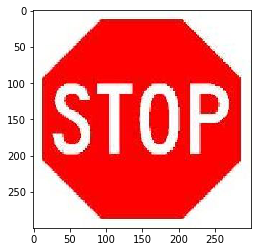

In [18]:
im1 = plt.imread("im1.jpg")
#im2 = plt.imread("im2.jpg")
#im3 = plt.imread("im3.jpg")
plt.imshow(im1)
#image1 = plt.imread("im3.jpg")  
#fig, ax = plt.subplots()
#ax.imshow(image1)
#ax.axis('off') 
#im2 = plt.imread("im2.jpg")
#fig, ax = plt.subplots()
#ax.imshow(im2)
#ax.axis('off') 
    


Déclarez une variable *im* contenant l'image chargez à la question précédente. Vous ramènerez les valeurs contenues dans la variable *im* entre 0 et 1.

In [19]:
im = im1/255
print(im)

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


Déclarez une variable *pixels* contenant tous les pixels de l’image *im*. Vous utiliserez la méthode *reshape* pour réaliser cette opération. 

In [20]:
a=np.shape(im)
print(a)
s1=np.reshape(im, (270000,1))
print("Vertical: ",s1)
s2=np.reshape(im, (1,270000))
print("horizental: ",s2)

(300, 300, 3)
Vertical:  [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
horizental:  [[1. 1. 1. ... 1. 1. 1.]]


Lancez les instructions suivantes permettant de voir la répartition des pixels dans le cube RGB.

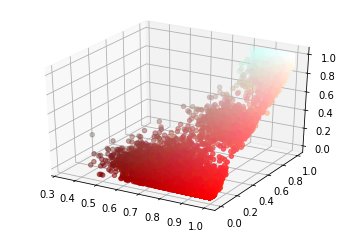

In [21]:
pixels = im.reshape(im.shape[0]*im.shape[1], im.shape[2])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pixels[:,0],pixels[:,1],pixels[:,2],c=pixels)
plt.show()

Appliquez la fonction *kmeans* que vous avez créé aux pixels. Vous prendrez 5 centres et 100 itérations. Stockez le résultat dans une variable *paltette*.

In [22]:
palette = kmeans(pixels, 5, 100)

Lancez le code suivant affichant la palette que vous venez de calculer. Le résultat vous semble-t-il pertinent pas rapport à l’objectif que l’on s’est fixé ? 

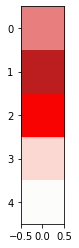

In [23]:
plt.imshow(palette[:,np.newaxis,:])
plt.show()

Placez dans une variable *a* l’association de chaque pixel à un des centres calculés se trouvant dans la variable *palette*.

In [24]:
a = association(pixels, palette)

Exécutez le code suivant pour obtenir l’histogramme des pixels en fonction des 5 couleurs que vous avez sélectionnées par k-moyennes.

1322 47017


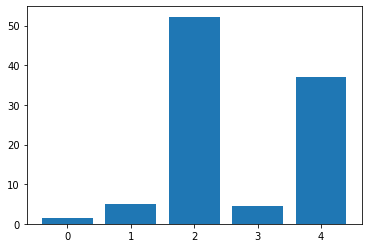

In [25]:
_,hist = np.unique(a, return_counts=True)
plt.bar(np.arange(5),hist/np.sum(hist)*100)
print(np.min(hist),np.max(hist))
plt.show()

Testez votre code avec une autre image.

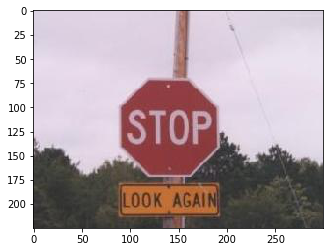

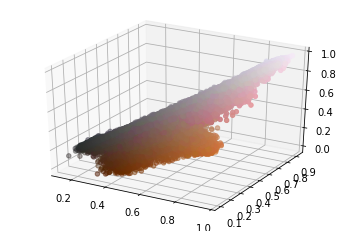

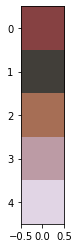

2864 36504


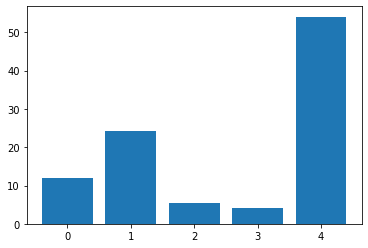

In [26]:
im1=plt.imread('im2.jpg')
plt.imshow(im1)

im=im1/255

pixels=im.reshape(-1,3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pixels[:,0],pixels[:,1],pixels[:,2], c=pixels)
plt.show()

palette = kmeans(pixels, 5, 100)

plt.imshow(palette[:,np.newaxis,:])
plt.show()

a = association(pixels, palette)

_,hist = np.unique(a, return_counts=True)
plt.bar(np.arange(5),hist/np.sum(hist)*100)
print(np.min(hist),np.max(hist))
plt.show()

3 - Requêtes dans une base d'image
------

Nous allons dans cette partie rechercher les images les plus proches dans une base d'image à des images requêtes.

Le code suivant permet d'afficher les 5 images requêtes stockées dans le fichier numpy *requete.npy* .

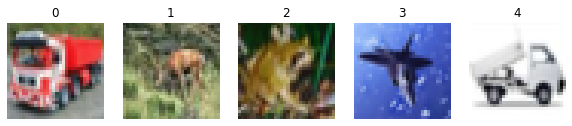

In [27]:
r = np.load('requetes.npy')
fig,ax=plt.subplots(1,len(r), figsize=(len(r)*2,1*2))
for i in range(len(r)):
    ax[i].imshow(r[i])
    ax[i].axis('off')
    ax[i].set_title(i)

Stockez dans une variable **x** les images de la base de donnée se trouvant dans le fichier *images.npy*.

(1000, 32, 32, 3)


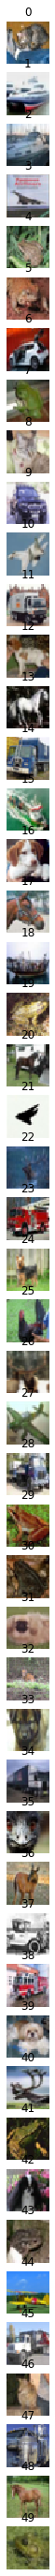

In [28]:
x = np.load('images.npy')
fig,ax=plt.subplots(50,1, figsize=(50,50))

print(np.shape(x))
for i in range(50):
    ax[i].imshow(x[i,:,:,:])
    ax[i].axis('off')
    ax[i].set_title(i)

Affichez les 25 premières images de la base selon 5 lignes et 5 colonnes. 

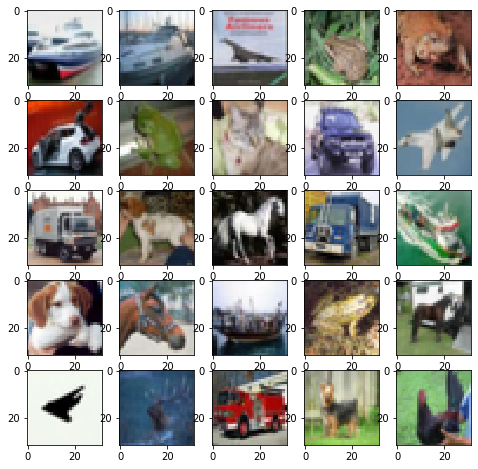

(1000, 32, 32, 3)


In [16]:
x = np.load('images.npy')
w=5
h=5
fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 5
for i in range(1, 26,1):
    img = x[i,:,:,:]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()
print(np.shape(x))

Stocker dans une variable **c** les centres se trouvant dans le fichier *clusters.npy*. Ces centres ont été appris en fessant une Kmoyennes sur les pixels de toutes les images de la base. 

In [29]:
c = np.load('clusters.npy')
print(np.shape(c))

(64, 3)


Déclarez une variable *pixels* contenant tous les pixels des images de *x*. Vous utiliserez la méthode *reshape* pour réaliser cette opération. 

In [33]:
pixel=x.reshape(-1,3)
#autre solution
#pixels=np.reshape(x, (3200, 320,3))
#print(np.shape(pixels))

Utilisez la fonction *association* pour associer chaque pixel à un centre. Vous stockerez le résultat dans une variable **a**.

In [34]:
a = association(pixel, c)
'''
center = np.array([[0.5,0.3,0.5]])
def association(pixels, center):
    d =sc.spatial.distance.cdist(pixel,center)
    return np.argmin(d, axis=1)



columns = 3200
rows = 320
for i in range(1, 3200,32):
     for j in range(1, 320,32):
        pixels= pixel[i,j,:]
association(pixels, center)
'''

'\ncenter = np.array([[0.5,0.3,0.5]])\ndef association(pixels, center):\n    d =sc.spatial.distance.cdist(pixel,center)\n    return np.argmin(d, axis=1)\n\n\n\ncolumns = 3200\nrows = 320\nfor i in range(1, 3200,32):\n     for j in range(1, 320,32):\n        pixels= pixel[i,j,:]\nassociation(pixels, center)\n'

Redimentionnez **a** pour avoir un tableau de la taille (nombre d'image,32,32).

In [35]:
a = np.resize(a, (25,32,32))

Exécutez le code suivant permettant à partir des assignations de chaque pixel à un cluster, de calculer l'histogramme de couleurs de l'image. 

In [36]:
hist = np.sum(a[:,:,:,np.newaxis] == np.arange(0,c.shape[0])[np.newaxis,np.newaxis,np.newaxis,:],axis=(1,2))

Faites de même pour calculer l'histogramme de couleurs pour les images requêtes. Vous stockerez le résultat dans une variable **hist_requetes**.

In [37]:
pixels=r.reshape(-1,3)

a = association(pixels, c)

a = np.resize(a, (25,32,32))

hist_requetes = np.sum(a[:,:,:,np.newaxis] == np.arange(0,c.shape[0])[np.newaxis,np.newaxis,np.newaxis,:],axis=(1,2))

Calculez les distances entre les histogrammes des images de la base et les histogrammes des requêtes. Stockez le résultat dans une variable **d**.

In [38]:
d = sc.spatial.distance.cdist(hist_requetes, hist)

Utilisez la fonction argsort de numpy pour ordonner les images par distance en fonction des requêtes. Vous aurez une matrice dont le nombre de ligne correspond au nombre de requête (5) et dont les valuers dans les colonnes donnent l'ordre des images de la plus proche à la plus éloignée visuellement. 

In [39]:
dSorted = d.argsort()

Pour chaque requête affichez les 4 images les plus proches. Le résultat vous semble-t-il pertinent ? 

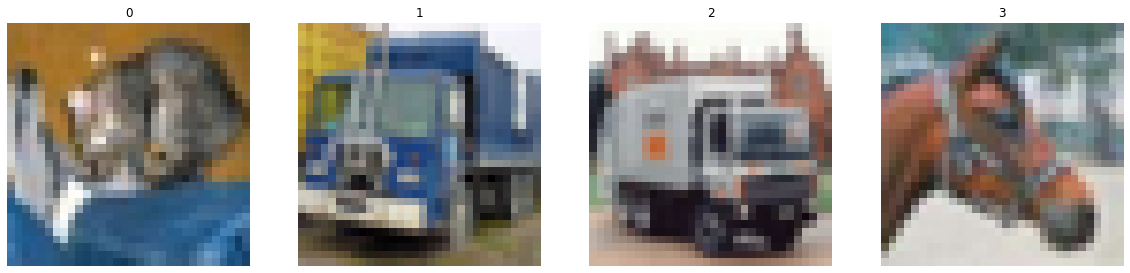

In [40]:
fig,ax=plt.subplots(1,4, figsize=(20,10))
for i in range(4):
    ax[i].imshow(x[dSorted[0,i]])
    ax[i].axis('off')
    ax[i].set_title(i)